<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

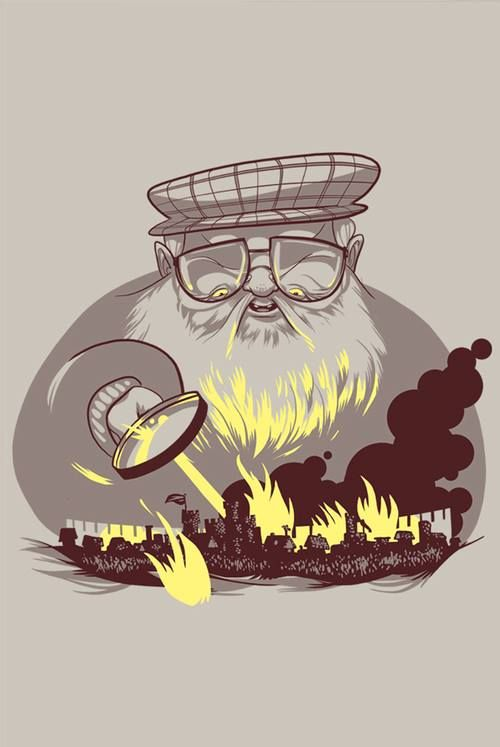

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # test dataset
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # train dataset


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')
test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<Axes: xlabel='S.No'>

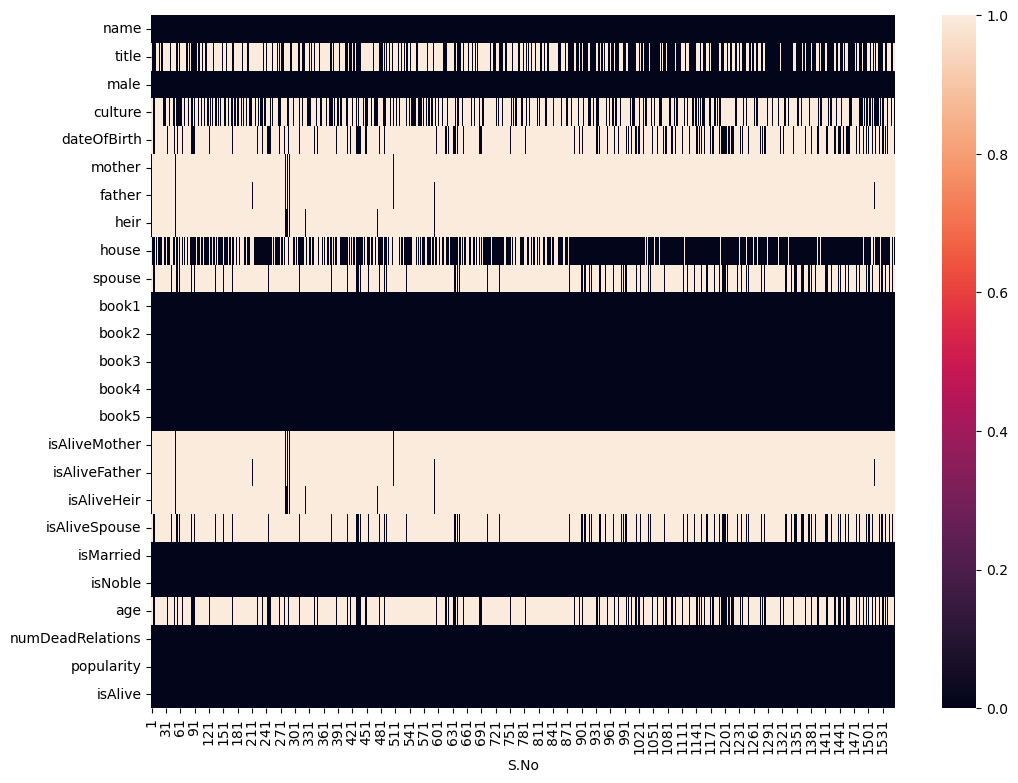

In [4]:
plt.figure(figsize=(12,9))
sns.heatmap(data.isna().transpose())

# Анализ
Выдвинем гипотезы на основе информации представленной на рисунке.
## Гипотезы:
- Пропуски для пар признаков  mother, father,heir, spouse и isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse совпадают;
- Пропуски в признаках age и dateOfBirth совпадают;
- Признак isMarried был получен на основе признака spouse (заменой пропусков на 0 и заменой непропущенных значений на 1);
- Признак isNoble был получен на основе признака title аналогичным образом;

In [5]:
#проверим есть ли в датасете строки для которых пропуски в соответствующих признаках не совпадают
relatives = ['mother', 'father', 'heir', 'spouse']
is_alive_rels = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

#Проверка первой гипотезы.
missmatches = 0
for rel, is_alive_rel in zip(relatives, is_alive_rels):
    missmatches += (data[rel].notna() != data[is_alive_rel].notna()).sum()
if missmatches == 0:
    print('Гипотеза 1 верна.')
else:
    print('Гипотеза 1 не верна.')

#Проверка второй гиптезы
missmatches = (data['age'].notna() != data['dateOfBirth'].notna()).sum()
if missmatches == 0:
    print('Гипотеза 2 верна.')
else:
    print('Гипотеза 2 не верна.')

#Проверка третьей гипотезы
missmatches = (data['spouse'].notna() != (data['isMarried'] == 1)).sum()
if missmatches == 0:
    print('Гипотеза 3 верна.')
else:
    print('Гипотеза 3 не верна.')

#Проверка четвертой гипотезы
missmatches = (data['title'].notna() != (data['isNoble'] == 1)).sum()
if missmatches == 0:
    print('Гипотеза 4 верна.')
else:
    print('Гипотеза 4 не верна.')


Гипотеза 1 верна.
Гипотеза 2 верна.
Гипотеза 3 верна.
Гипотеза 4 не верна.


In [6]:
# Проверим есть ли знатные персонажи с отсутствующим титулом

noble_without_title = data['title'][data['isNoble'] == 1].isna().sum()
if noble_without_title == 0:
    print('Знатных персонажей с отсутствующим титулом нет.')
else:
    print('Знатные персонажи с отсутствующим титулом есть.')

Знатных персонажей с отсутствующим титулом нет.


# Вывод 1.3
Пропущенные значения есть. Пропуски заполню в процессе обработки.
## По гипотезе 1.
Можно попробовать создать словарь с именами мертвых и живых персонажей.
## По гипотезе 2.
Возможно следует создать один признак и даты рождения и возраста.
## По гипотезе 3 и 4.
Признак isMarried можно выбросить. Вся информация есть в других признаках.

In [7]:
data.drop(columns='isMarried', inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn' : ['ironborn', 'ironman'], #добавил так как это вроде одно и тоже
    'Lhazarene' : ['lhazarene', 'lhazareen'], #добавил так как это вроде одно и тоже
}

In [9]:
# Добавление информации о домах из имени
# Составляем список домов
houses = list(data.house.dropna().unique())
houses_names = []
for house in houses:
    if house[:6] == 'House ':
        houses_names.append(house[6:])

# функция для добавления дома если название дома встречается в имени примера
def add_house(row):
    if row['house'] is np.nan:
        for house_name in houses_names:
            if house_name in row['name']:
                return f'House {house_name}'
    else:
        return row['house']
    
data['housePrep'] = data.apply(add_house, axis = 1)
data.drop(columns = ['house'], inplace = True)
data = data.rename(columns = {'housePrep' : 'house'})

test['housePrep'] = test.apply(add_house, axis = 1)
test.drop(columns = ['house'], inplace = True)
test = test.rename(columns = {'housePrep' : 'house'})

In [10]:
# Создаем указанные признаки на тренировочном наборе данных
data['isPopular'] = data.popularity > 0.5
data['boolDeadRelations'] = data.numDeadRelations > 0
# Упрощаем признак culture Lhazarene and Lhazareen
# Так как в словаре все культуры подлежащие замене строчными записаны, сделаем все записи в столбце строчными
data['culture'] = data['culture'].str.lower()
# Произведем замену
cultture_replacement_dict = {value: key for key, values in cult.items() for value in values}
data['culture'] = data['culture'].replace(cultture_replacement_dict, regex = True)

# Создаем указанные признаки на тестовом наборе данных
test['isPopular'] = test.popularity > 0.5
test['boolDeadRelations'] = test.numDeadRelations > 0
test['culture'] = test['culture'].str.lower()
test['culture'] = test['culture'].replace(cultture_replacement_dict, regex = True)

In [11]:
# Посмотрим на возможность упрощения признака title
titles = data['title'].value_counts().index.tolist()
print(titles)

['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon', 'Winterfell', 'Lady', 'King in the North', 'Septa', 'Princess', "Lord Commander of the Night's Watch", 'Cupbearer', 'Prince', 'Grand Maester', 'Wisdom', 'Khal', 'King-Beyond-the-Wall', 'Prince of Dragonstone', 'Last Hearth', 'Duskendale', 'Lord Paramount of the Mander', 'Eyrie', 'Casterly Rock', 'Bloodrider', 'Lord of the Tides', 'Bitterbridge', 'Harrenhal', 'Queen', 'Brother', 'Starpike', 'Master of Coin', 'Crag', 'Stonehelm', 'Goodwife', 'Khalakka', 'Karhold', 'Cerwyn', 'Coldmoat', 'Ashford', 'Captain of the guard', 'Blackcrown', 'Golden Tooth', 'Good Master', 'Hornwood', 'Lord Reaper of Pyke', 'Castellan', 'Riverrun', 'Steward', 'Hand of the King', 'Yronwood', 'Knight', 'Prince of Dorne', 'Stokeworth', 'KhalKo (formerly)', 'PrincessQueen', 'King', 'Rills', 'Undergaoler', 'Cobblecat', 'Longsister', "Knight of Griffin's Roost", 'Coldwater Burn', 'Lordsport', 'Lord of the Crossing', 'First Sword of Braavos', "Lord of Flint's Finger", 

In [12]:
# Поскольку есть много титулов начинающихся на Lord, Prince, Lady и King создадим словарь для замены
title_replacement_dict = {}
for title in titles:
    if title[:4] == 'Lord':
        title_replacement_dict[title] = 'Lord'
    elif title[:4] == 'King':
        title_replacement_dict[title] = 'King'
    elif title[:4] == 'Lady':
        title_replacement_dict[title] = 'Lady'
    elif title[:5] == 'Princ':
        title_replacement_dict[title] = 'Prince'

# Произведем замены
data['title'] = data['title'].replace(title_replacement_dict)
test['title'] = test['title'].replace(title_replacement_dict)

In [13]:
# Создадим список мертвых и живых по признакам mother, father,heir, spouse и isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse
dead_by_name = []
alive_by_name = []
for rel, is_alive_rel in zip(relatives, is_alive_rels):
    dead_by_name += data[rel][data[is_alive_rel] == 0].values.tolist()
    alive_by_name += data[rel][data[is_alive_rel] == 1].values.tolist()
    
# уберем дубликаты из списков на случай если в датасете попалсиь, например, наследник и отец
# и создаем список для замены
name_replacment_dict = {**dict.fromkeys(alive_by_name, 1), **dict.fromkeys(dead_by_name, 0)}

# Создаем признак
data['isAliveByName'] = data.name.map(name_replacment_dict)
test['isAliveByName'] = test.name.map(name_replacment_dict)

In [14]:
# Обработаем признаки book1, book2 и т.д. Возможно, появление персонажа 
#в первых книгах и его отсутствие в последних может свиетельствовать оего смерти.
# Создадим признак учитывающий порядок появления персонажа в книгах
books = ['book1', 'book2', 'book3', 'book4', 'book5']
data['bookOrder'] = data[books].astype(str).sum(axis = 1)
test['bookOrder'] = test[books].astype(str).sum(axis = 1)

In [15]:
# Поскольку в признаках age и dateOfBirth пропуски совпадают,
# то можно предположить что все живые персонажи будут иметь одну и туже сумму
# age + dateOfBirth, а таже сумма мертвых персонажей будет отличаться.
(data.age + data.dateOfBirth).value_counts().head(10)

305.0    189
299.0     21
300.0      9
130.0      4
209.0      4
283.0      3
129.0      3
271.0      3
120.0      2
276.0      2
Name: count, dtype: int64

In [16]:
# Проверим все ли персонажи с суммой возраста и даты рождения равной 305 живы.
# Все ли персонажи с суммой даты рождения и возраста не равной 305 мертвы.
print('Количество живых и мертвых персонажей для которых возраст и дата рождения равна 305:')
print(data.isAlive[(data.age + data.dateOfBirth) == 305].value_counts())
print('Количество живых и мертвых персонажей для которых возраст и дата рождения не равна 305:')
print(data.isAlive[(data.age + data.dateOfBirth) != 305][data.age.notna()].value_counts())

Количество живых и мертвых персонажей для которых возраст и дата рождения равна 305:
isAlive
1    189
Name: count, dtype: int64
Количество живых и мертвых персонажей для которых возраст и дата рождения не равна 305:
isAlive
0    90
Name: count, dtype: int64


In [17]:
# Создадим новый признак с единицей для тех у кого сумма возраста и даты рожения равна 1
# и 0 для тех у кого не равна.
data['aliveByDate'] = data.age + data.dateOfBirth
data.loc[data.age.notna(), 'aliveByDate'] = data.loc[data.age.notna(), 'aliveByDate'].apply(lambda x: 1 if x == 305 else 0)
# Пропуски заполним отношем виживших к общему числу примеров (в расчет возьмем примеры для которы признак не определен)
alive_freq = (data.loc[data.age.isna(), 'isAlive'] == 1).sum() / len(data.age.isna())
data['aliveByDate'] = data['aliveByDate'].fillna(alive_freq)

# для test выборки
test['aliveByDate'] = test.age + test.dateOfBirth
test.loc[test.age.notna(), 'aliveByDate'] = test.loc[test.age.notna(), 'aliveByDate'].apply(lambda x: 1 if x == 305 else 0)
# Пропуски заполним отношем виживших к общему числу примеров (в расчет возьмем примеры для которы признак не определен)
test['aliveByDate'] = test['aliveByDate'].fillna(alive_freq)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [18]:
binary_features = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', \
                    'isNoble', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', \
                    'isPopular', 'boolDeadRelations', 'isAliveByName', 'aliveByDate']

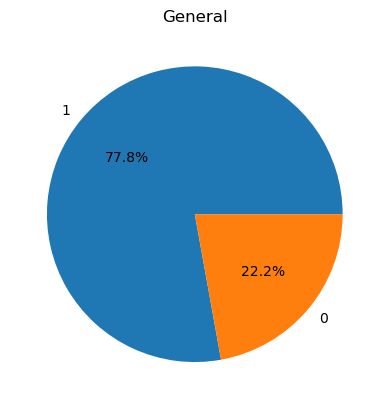

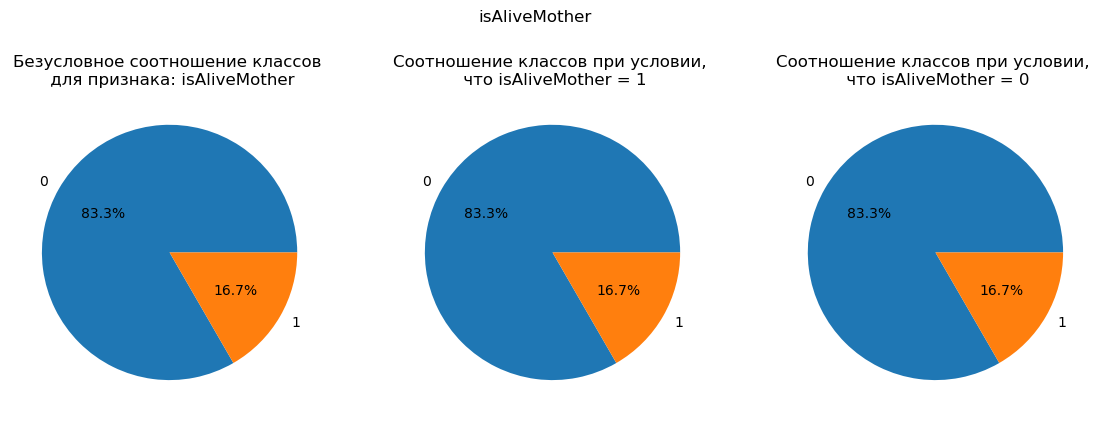

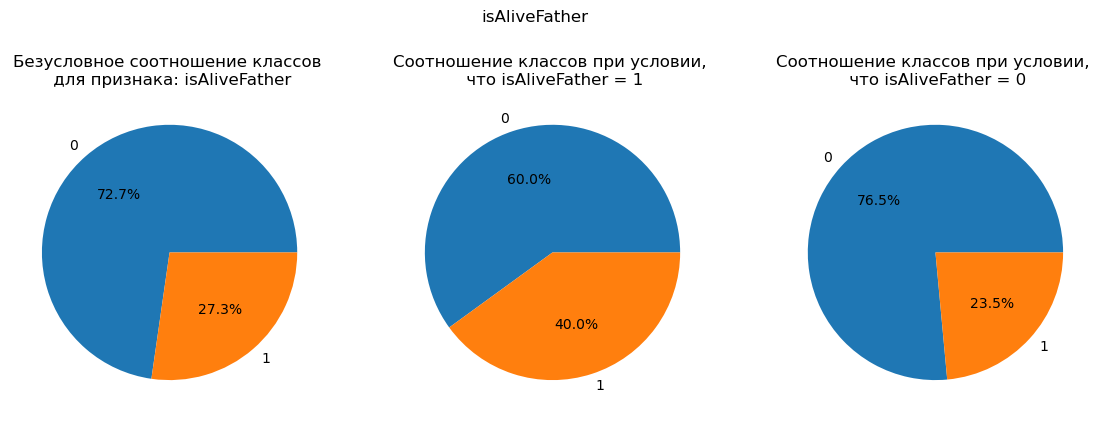

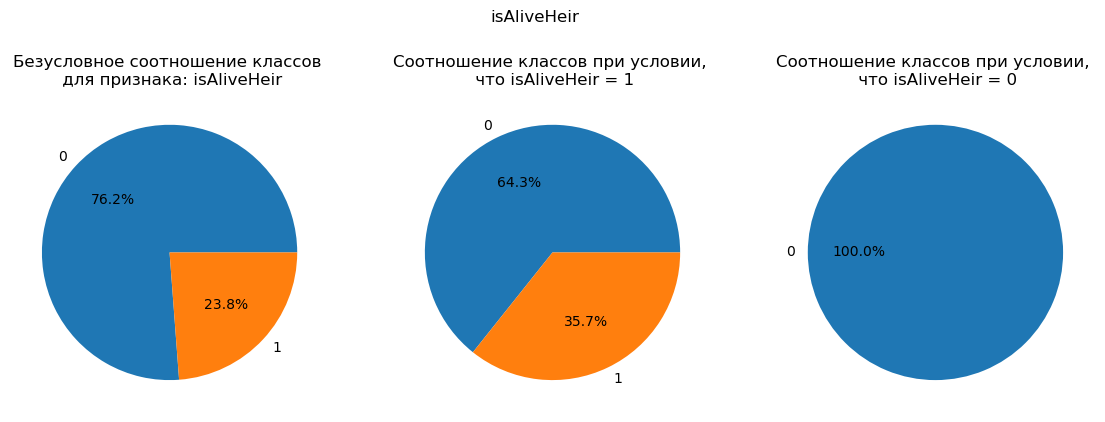

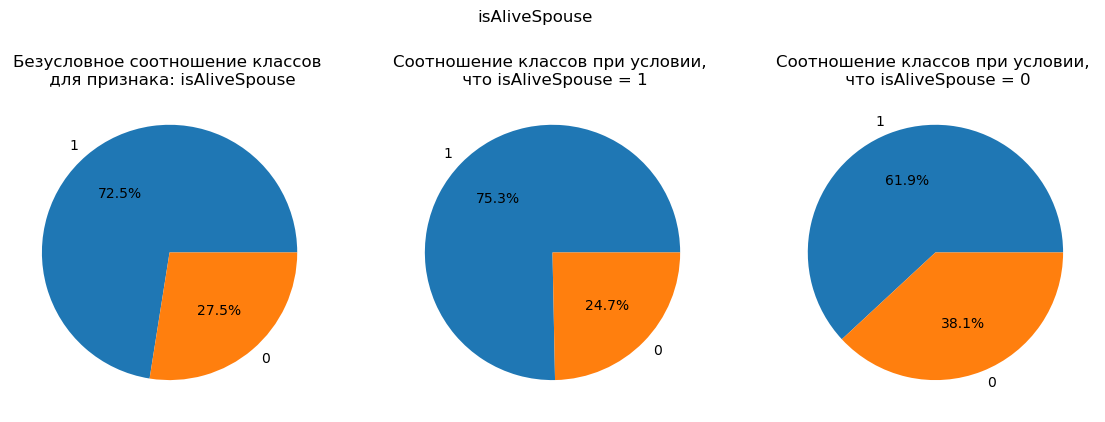

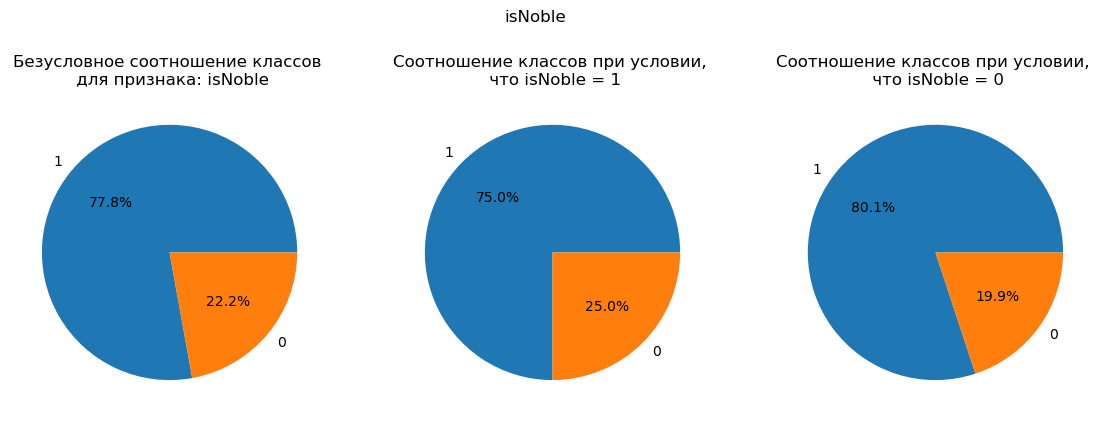

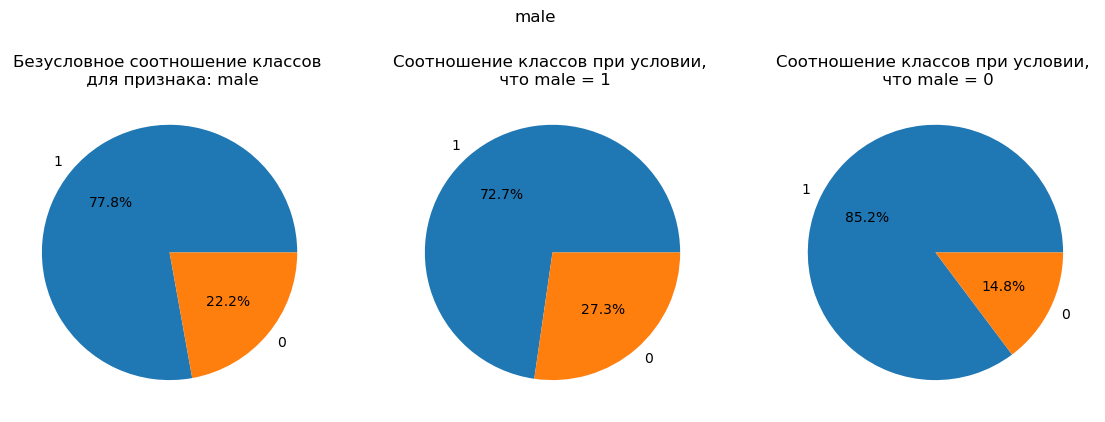

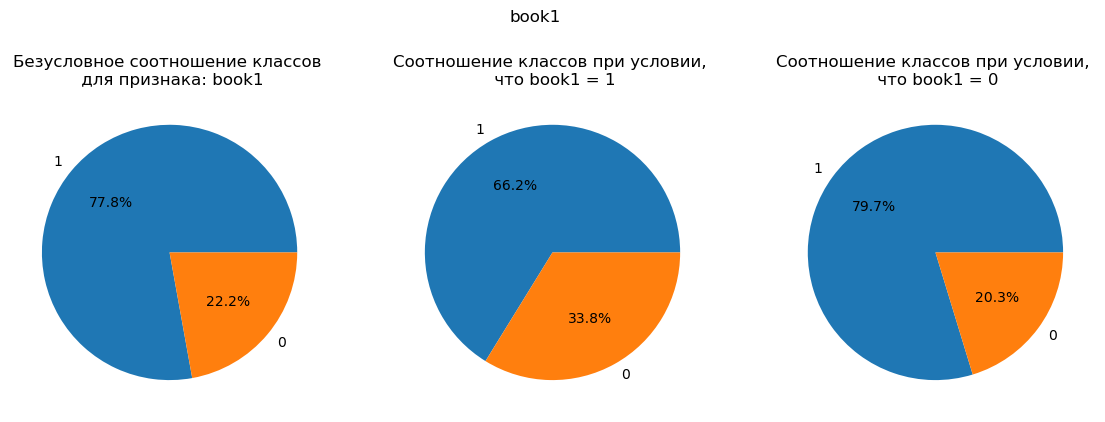

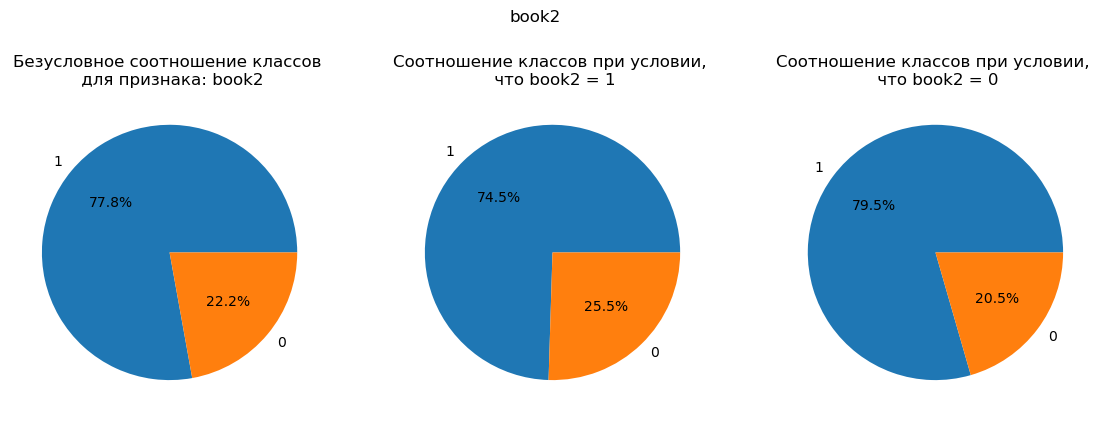

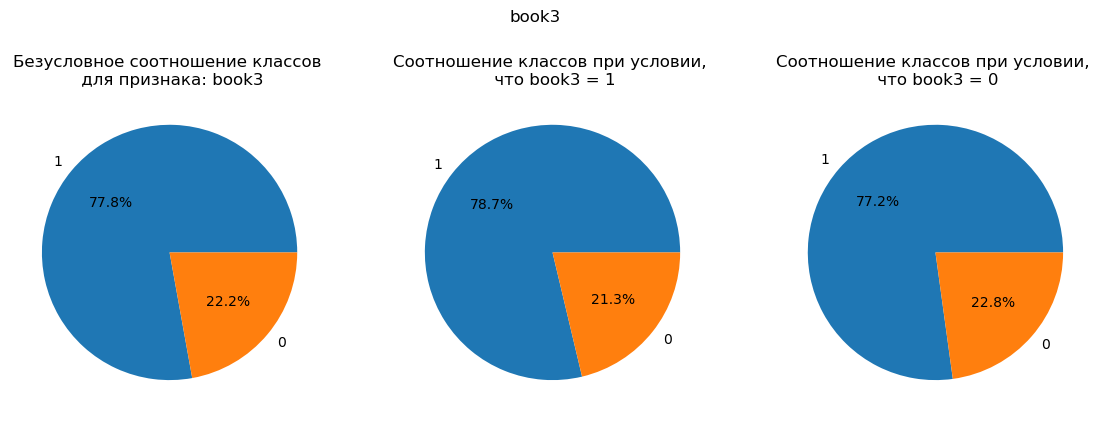

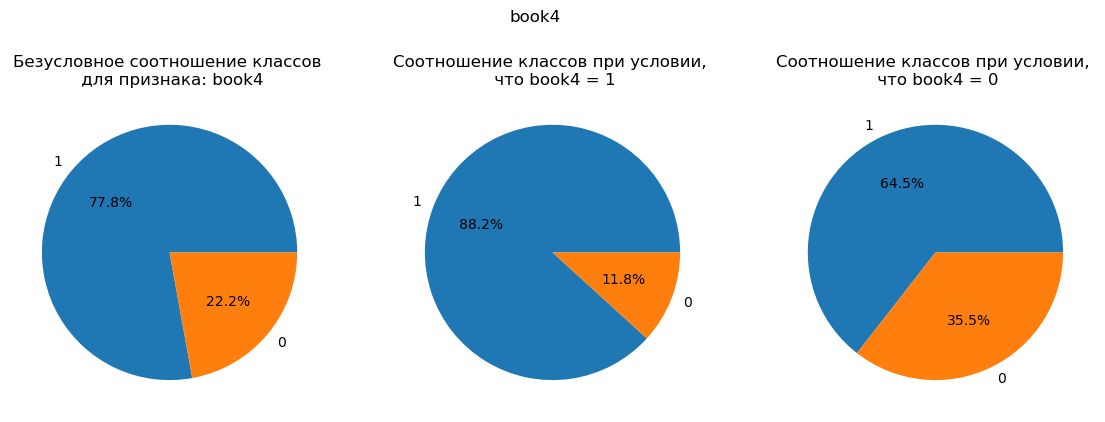

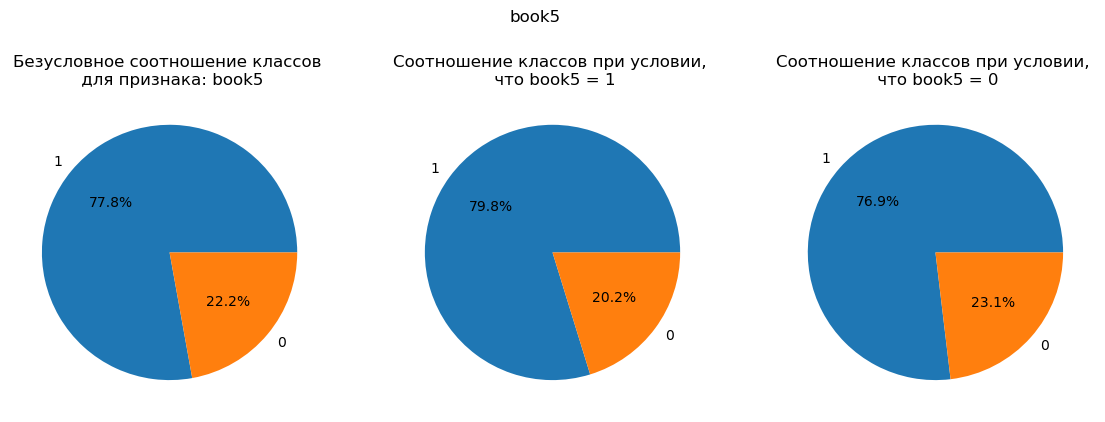

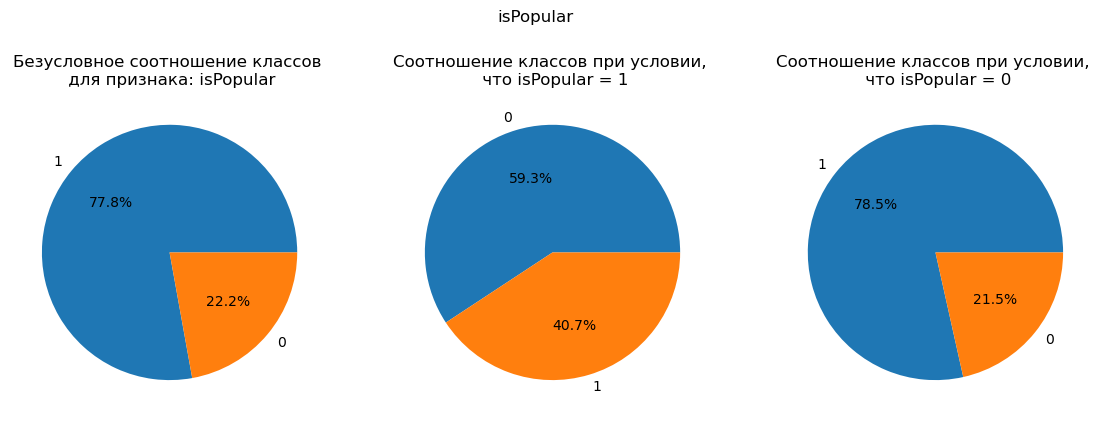

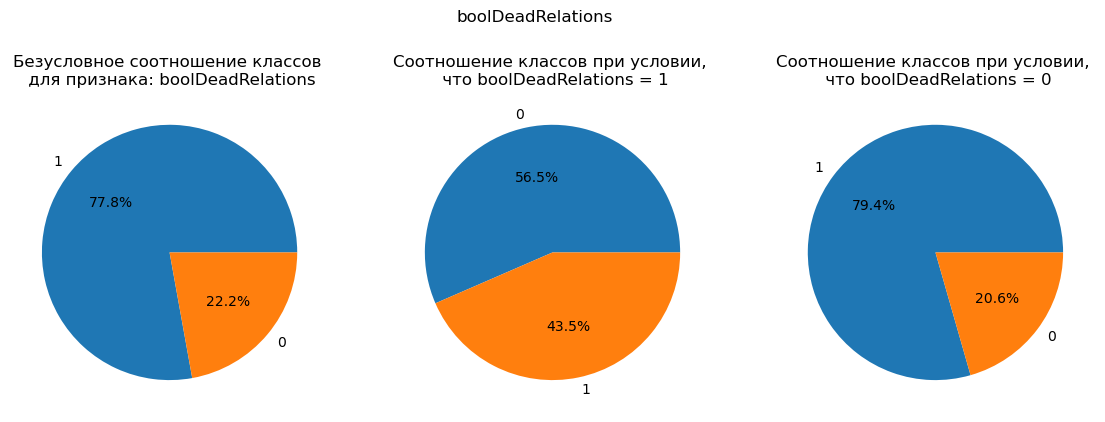

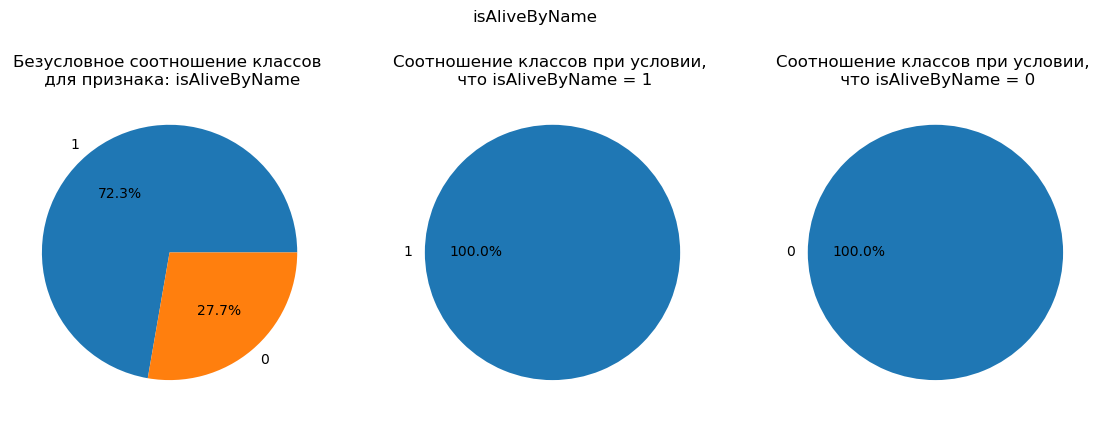

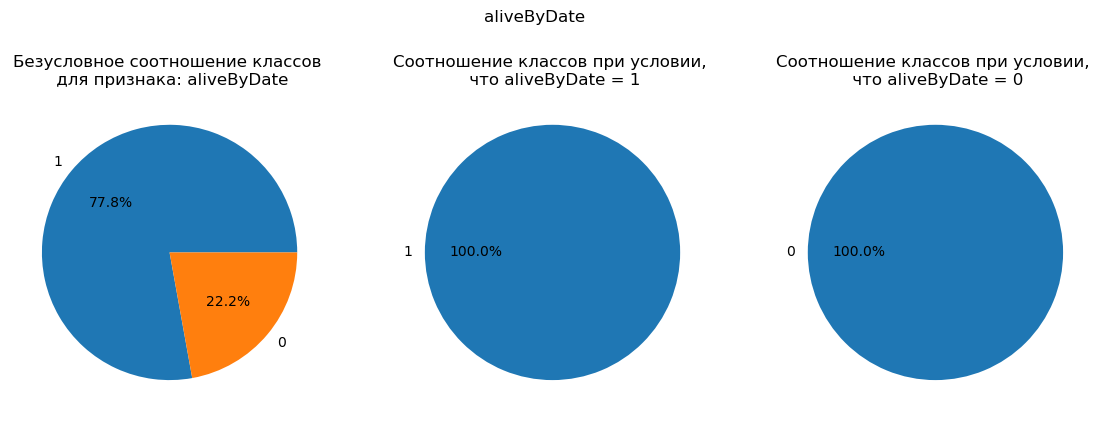

In [19]:
# посмотрим на распределение целевой переменной
data_to_plot = data.isAlive.value_counts()
plt.title('General')
plt.pie(data_to_plot.values, labels=data_to_plot.index, autopct='%1.1f%%')

# проанализируем влияние признаков на целевую переменную
for binary_feat in binary_features:
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(14,5))
    fig.suptitle(binary_feat)
    ax0.set_title('Безусловное соотношение классов \n для признака: ' + binary_feat)
    data_to_plot = data.loc[data[binary_feat].notna(), 'isAlive'].value_counts()
    ax0.pie(data_to_plot.values, labels=data_to_plot.index, autopct='%1.1f%%')
    ax1.set_title('Cоотношение классов при условии, \n что ' + binary_feat + ' = 1')
    data_to_plot = data.loc[data[binary_feat] == 1, 'isAlive'].value_counts()
    ax1.pie(data_to_plot.values, labels=data_to_plot.index, autopct='%1.1f%%')
    ax2.set_title('Cоотношение классов при условии, \n что ' + binary_feat + ' = 0')
    data_to_plot = data.loc[data[binary_feat] == 0, 'isAlive'].value_counts()
    ax2.pie(data_to_plot.values, labels=data_to_plot.index, autopct='%1.1f%%')
    plt.show()

# Выводы
- наличие информации об отце, матери или наследниках сильно уменьшет шансы на выживание;
- наличие информации о супруге уменьшает шансы на выживание, только при условии, что супруг мертв;
- признак isNoble практически не влияет на целевую переменную;
- признак male слабо влияет на целевую переменную;
- признаки book1 и book4 влияют на целевую переменную;
- book2, book3, book5 практически не влияют;
- признаки isPopular и boolDeadRelation влияют на целевую переменную;
- признаки isAliveByName aliveByDate полностью разделяют классы для тех примеров для которых они определены.

In [20]:
# Поскольку признаки о наличии кровных родственников влияют на целевую переменную,
# но большинство значений пропущены
# создадим признак с наличием информации о кровных родственниках, а исходные признаки выбросим
blood = data[['isAliveMother', 'isAliveFather', 'isAliveHeir']].notna().values
blood = blood.sum(axis = 1)
data['isBloodRel'] = blood != 0

blood = test[['isAliveMother', 'isAliveFather', 'isAliveHeir']].notna().values
blood = blood.sum(axis = 1)
test['isBloodRel'] = blood != 0

# Поскольку мы выбросили признак is Married, на том основании, что он дублировался isAliveSpouse
#то заменим все пропуски в признаке isAliveSpouse на значение 'notMarried'
data['isAliveSpouse'] = data['isAliveSpouse'].fillna('notMarried')
test['isAliveSpouse'] = test['isAliveSpouse'].fillna('notMarried')

# Пропуски в признаке 'isAliveByName' заполним 'nameUnkowing'
data['isAliveByName'] = data['isAliveByName'].fillna('isMissing')
test['isAliveByName'] = test['isAliveByName'].fillna('isMissing')

In [21]:
#выбросим ненужные признаки
feature_to_drop = ['mother', 'father', 'heir', 'spouse', 'name',\
                   'isAliveMother', 'isAliveFather', 'isAliveHeir',\
                   'isNoble', 'book2', 'book3', 'book5'] #'title'
data.drop(columns=feature_to_drop, inplace=True)
test.drop(columns=feature_to_drop, inplace=True)

## Числовые признаки

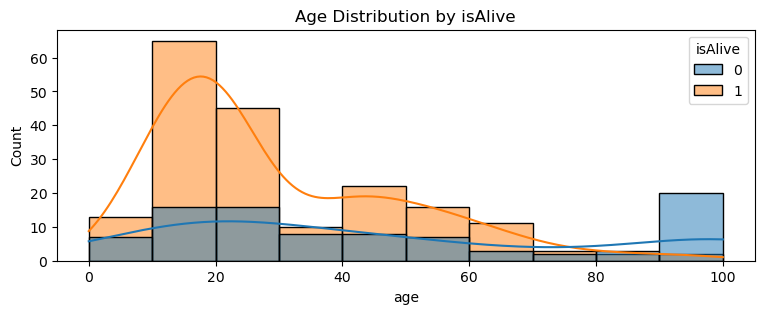

In [22]:
plt.figure(figsize=(9, 3))
sns.histplot(data=data, x='age', kde=True, hue='isAlive')
plt.title('Age Distribution by isAlive')
plt.show()

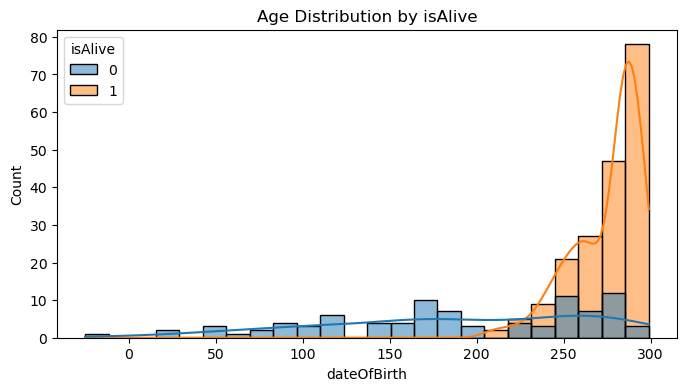

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='dateOfBirth', kde=True, hue='isAlive')
plt.title('Age Distribution by isAlive')
plt.show()

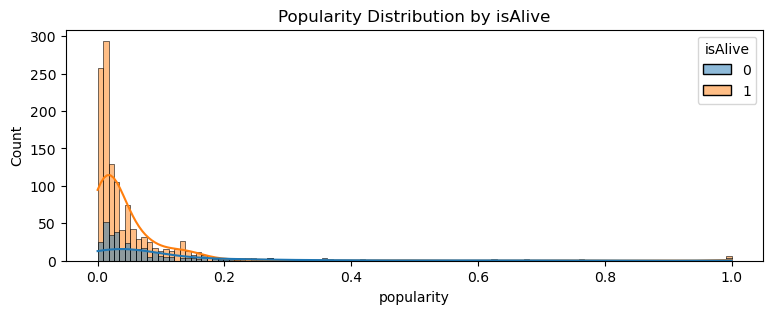

In [24]:
plt.figure(figsize=(9, 3))
sns.histplot(data=data, x='popularity', kde=True, hue='isAlive')
plt.title('Popularity Distribution by isAlive')
plt.show()

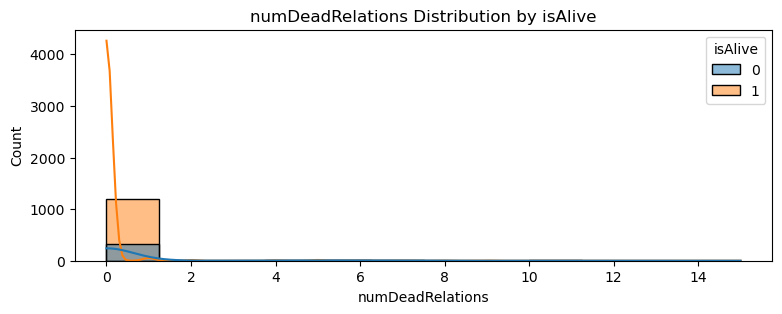

In [25]:
plt.figure(figsize=(9, 3))
sns.histplot(data=data, x='numDeadRelations', kde=True, hue='isAlive')
plt.title('numDeadRelations Distribution by isAlive')
plt.show()

In [26]:
data.numDeadRelations.value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
11       1
12       1
15       1
9        1
Name: count, dtype: int64

# Вывод
- все числовые признаки вляют на целевую переменную;
- признаки age и dateOfBirth следует выбросить, так как по их распределению невозможно идеально разделить целевую переменную, а по созданному на их основе признаку aliveByDate можно;
- признак polularity следует оставить, а выбросить его бинарную версию, так как можно выделить как минимум три участка, где распределения мертвых и живых отличаются и понадеятся, что модель сможет обработать этот признак лучше;
- признак numDeadRelations тоже слежует выбросить, так как дополнительной информации по сравнению с бинарной версией там нет.

In [27]:
#выбросим ненужные признаки
feature_to_drop = ['age', 'dateOfBirth', 'numDeadRelations', 'isPopular',]
data.drop(columns=feature_to_drop, inplace=True)
test.drop(columns=feature_to_drop, inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [28]:
data.isAlive.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

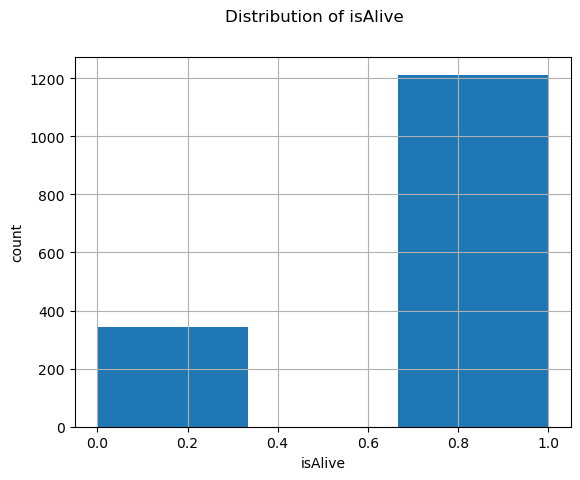

In [29]:
plt.figure()

data['isAlive'].hist(density=False, bins = 3)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

Целевая переменная является бинарной категориальной, не сбалансированной.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

# Обработка категориальных признаков

In [30]:
categorical_columns = ['male', 'culture', 'house', 'book1', 'book4', 'isAliveSpouse',
                       'boolDeadRelations', 'title', 'bookOrder', 'isAliveByName']
categorical_features = data[categorical_columns]

# Признаки которые следует закодировать
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

print('Признаки для кодирования: ')
print(unprocessed_cat_features)

Признаки для кодирования: 
['culture', 'house', 'isAliveSpouse', 'title', 'bookOrder', 'isAliveByName']


# Кодирование категориальных признаков
Кодирование будем осществлять следующим образом:
1. Заменим все пропуски на значение 'isMissing', т.е. введем для таких примеров отдельую категорию;
2. Составим список всех категорий для каждого признака.
3. Категории для которых встречается меньше 5 примеров объединим в категорию 'Rare'.
4. Закодируем каждую категорию отношением выживших к общему числу примеров для этой категории, т.е. оценкой вероятности выжить для примеров относящихся к этой категории.

In [31]:
# Заполняем пропуски значением Miss
data[unprocessed_cat_features] = data[unprocessed_cat_features].replace(np.nan, 'isMissing')
test[unprocessed_cat_features] = test[unprocessed_cat_features].replace(np.nan, 'isMissing')

In [32]:
def encodeByFreq(feature):
    # Составим списки домов, культур и титулов для которых есть больше 5 примеров
    vc = data[feature].value_counts()
    listFreqElements = vc[vc >= 6].index.tolist()
    # Заменим оставшиеся элементы столбца значением "Rare"
    data[feature] = data[feature].apply(lambda x: x if x in listFreqElements else 'Rare')
    test[feature] = test[feature].apply(lambda x: x if x in listFreqElements else 'Rare')
    listFreqElements.append('Rare')
    # Составим спсиок в частотой оставшихся в живых
    freqAlive = []
    for element in listFreqElements:
        numElements = (data[feature] == element).sum()
        aliveElements = (data['isAlive'][data[feature] == element] == 1).sum()
        freqAlive.append(aliveElements / numElements)
    # Составим словарь с ключами возможных значений столбца и значением частоты выживших для этого ключа
    dictFreqElements = {key : value for key, value in zip(listFreqElements, freqAlive)}
    # Закодируем признаки частотой оставшихся в живых
    data[feature] = data[feature].map(dictFreqElements)
    test[feature] = test[feature].map(dictFreqElements)

for unprocessed_cat_feature in unprocessed_cat_features:
    encodeByFreq(unprocessed_cat_feature)

C:\Users\pasha\AppData\Local\Temp\ipykernel_2228\1702568006.py:14: RuntimeWarning: invalid value encountered in scalar divide
  freqAlive.append(aliveElements / numElements)
C:\Users\pasha\AppData\Local\Temp\ipykernel_2228\1702568006.py:14: RuntimeWarning: invalid value encountered in scalar divide
  freqAlive.append(aliveElements / numElements)


## Проверим коррелированность признаков

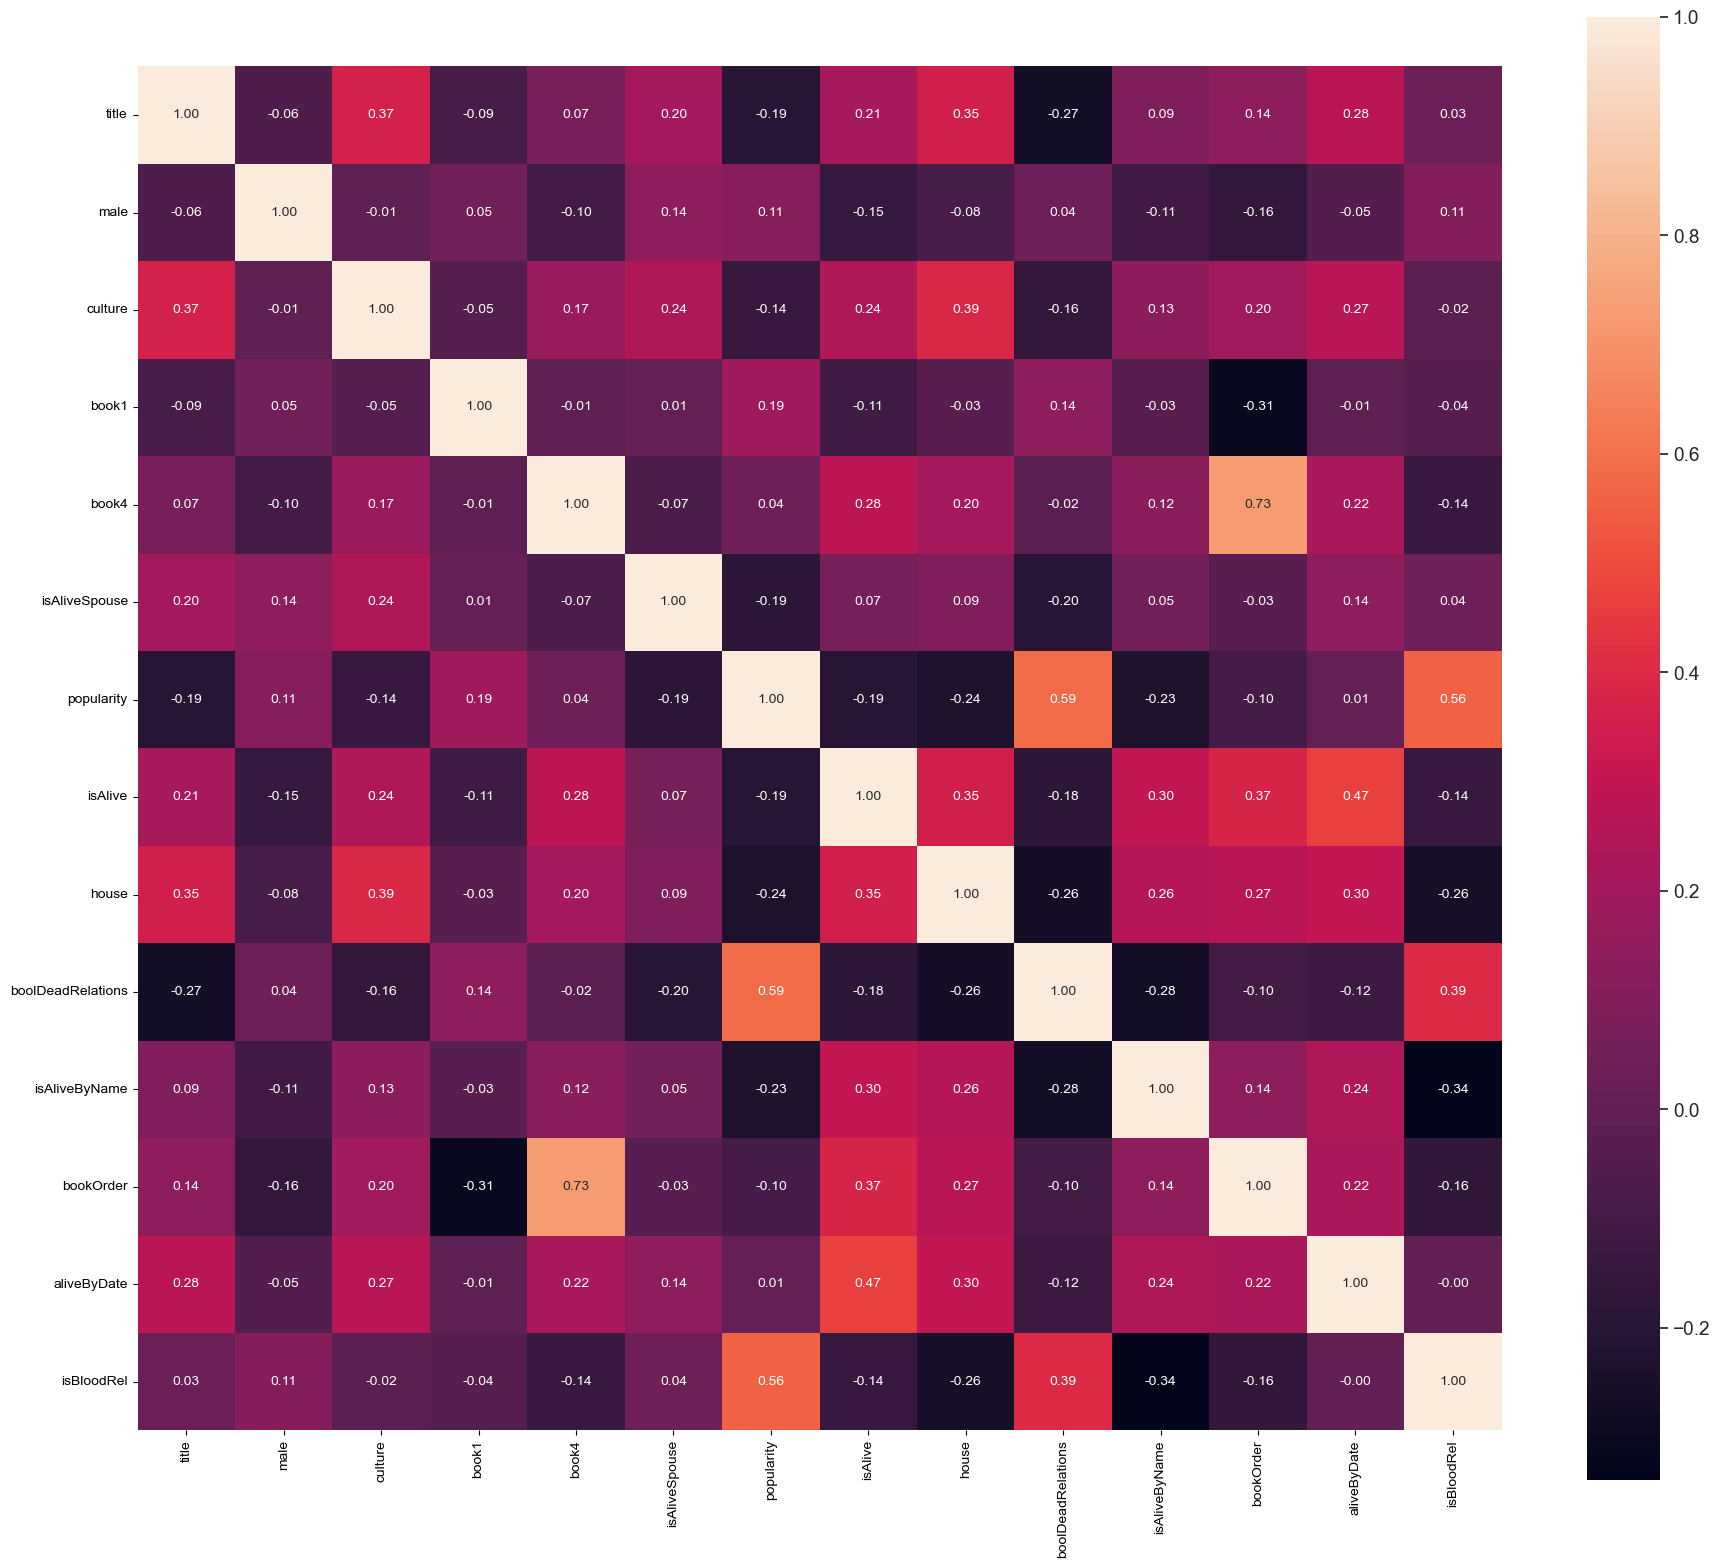

In [33]:
df = data
corrmat = df.corr()
f, ax = plt.subplots(figsize=(22, 19))
cols = df.columns.to_list()
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

In [34]:
# Признаки book1, book4 коррелированы с bookOrder. Видимо, вся информация есть в последнем признаке.
# А признак boolDeadRelations коррелирована с popularity. Учитывая его сомнительное распределение 
# его тоже проще выбросить.
data.drop(columns = ['book1', 'book4', 'boolDeadRelations'], inplace = True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [35]:
corrmat = data.corr()
corr_dict = {column : cor[0] for cor, column in zip(corrmat.isAlive.values.reshape(-1,1), data.columns.to_list())}
sorted_corr = sorted(corr_dict.items(), key = lambda x: np.abs(x[1]))
for feature in sorted_corr:
    print(f'{feature[0]}: {feature[1]:.3f}')

isAliveSpouse: 0.068
isBloodRel: -0.141
male: -0.148
popularity: -0.194
title: 0.212
culture: 0.243
isAliveByName: 0.300
house: 0.355
bookOrder: 0.374
aliveByDate: 0.472
isAlive: 1.000


In [36]:
important_features = corrmat.isAlive[np.abs(corrmat.isAlive) >= 0.05]
important_features = list(important_features.drop('isAlive').index)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [37]:
X = data[important_features].values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [40]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [43]:
models = [
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GaussianProcessClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier()
    ]

y_preds = []

for model in models:
    model.fit(X_train, y_train)
    y_preds.append(model.predict(X_test))

C:\Users\pasha\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [44]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [45]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8622


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [46]:
for y_pred, model in zip(y_preds, models):
    accuracy = accuracy_score(y_test, y_pred)
    model_name = type(model).__name__
    print(f"Accuracy of {model_name}: {accuracy:.4f}")

Accuracy of AdaBoostClassifier: 0.8590
Accuracy of RandomForestClassifier: 0.8814
Accuracy of GaussianProcessClassifier: 0.8622
Accuracy of GaussianNB: 0.8333
Accuracy of KNeighborsClassifier: 0.8654
Accuracy of SVC: 0.8654
Accuracy of DecisionTreeClassifier: 0.8526


Выберите лучшую модель.

Так как датасет маленький, то результаты моделей зависят от разбиения. Лучшие результаты окло 0.86 - 0.87.
Лес выбрал, так как он не склонен к переобучению. А лес более или менее стабильно дает > 0.85 при сабмите на степик. 

In [47]:
X_test = test[important_features].values
# Шаг 1. создание модели
model = RandomForestClassifier()
# Шаг 2. обучение модели
model.fit(X, y)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [48]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [49]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [50]:
submission['isAlive'] = y_pred

In [51]:
submission.to_csv("new_submission.csv", index=False) #Accuracy вашего решения равен 0.8534704370179949. Это дает вам 5.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.

# P.S.
Можо улучшить результаты добавив в списки имен живых и мертвых информацию из test выборки. Но поскольку это не спортивно, я решил этого не делать. Неожиданно хорошую прибавку дает создание нового признака из книг. Учет хронологии появления персонажей (порядка появления в книгах), который изначально в дата сете есть только в названии признаков, сильно улучшает результаты.